In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Sample data
events = ["Tech Fest", "Workshop", "Cultural Night", "Seminar", "Hackathon"]
departments = ["Computer Science", "Commerce", "Arts", "Science", "Management"]
positive_comments = ["Amazing event!", "Very engaging and fun.", "Well organized.", "Great experience!", "Loved the sessions."]
neutral_comments = ["It was okay.", "Could be more interactive.", "Average experience.", "Not too bad.", "Good effort."]
negative_comments = ["Too long and boring.", "Poor sound system.", "Started late.", "Not engaging enough.", "Disorganized."]

# Generate 120 rows
data = []
for i in range(1,121):
    student_id = f"S{i:03d}"
    event = random.choice(events)
    dept = random.choice(departments)
    rating = random.randint(1,5)
    if rating >=4:
        comment = random.choice(positive_comments)
    elif rating ==3:
        comment = random.choice(neutral_comments)
    else:
        comment = random.choice(negative_comments)
    date = datetime.today() - timedelta(days=random.randint(1,90))
    data.append([student_id, event, dept, rating, comment, date.strftime("%Y-%m-%d")])

# Create DataFrame
df = pd.DataFrame(data, columns=["Student ID","Event Name","Department","Rating","Feedback Comment","Date"])

# Save Excel file
df.to_excel("feedback_sheet.xlsx", index=False)
print("✅ Excel file created: feedback_sheet.xlsx")


✅ Excel file created: feedback_sheet.xlsx


In [ ]:
from google.colab import files
files.download("feedback_sheet.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Upload Excel file
from google.colab import files
uploaded = files.upload()

# Read the Excel file into a DataFrame
df = pd.read_excel("feedback_sheet.xlsx")

# Preview the first 5 rows
df.head()


Saving feedback_sheet.xlsx to feedback_sheet (1).xlsx


,Student ID,Event Name,Department,Rating,Feedback Comment,Date
0,S001,Hackathon,Arts,4,Loved the sessions.,2025-07-15
1,S002,Tech Fest,Management,5,Very engaging and fun.,2025-06-30
2,S003,Hackathon,Science,4,Great experience!,2025-07-12
3,S004,Tech Fest,Management,5,Well organized.,2025-07-03
4,S005,Cultural Night,Commerce,4,Very engaging and fun.,2025-06-16


In [ ]:
# Check dataset info
df.info()

# Quick statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student ID        120 non-null    object
 1   Event Name        120 non-null    object
 2   Department        120 non-null    object
 3   Rating            120 non-null    int64 
 4   Feedback Comment  120 non-null    object
 5   Date              120 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.8+ KB


,0
Student ID,0
Event Name,0
Department,0
Rating,0
Feedback Comment,0
Date,0


In [ ]:
# See if there are any empty cells
print("Missing values per column:\n", df.isnull().sum())

# Check unique event names
print("\nUnique Events:", df["Event Name"].unique())

# Check ratings range
print("\nRating values:", df["Rating"].unique())


Missing values per column:
 Student ID          0
Event Name          0
Department          0
Rating              0
Feedback Comment    0
Date                0
dtype: int64

Unique Events: ['Hackathon' 'Tech Fest' 'Cultural Night' 'Workshop' 'Seminar']

Rating values: [4 5 1 3 2]


In [ ]:
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)


In [ ]:
# Filter only valid ratings
df = df[df["Rating"].between(1,5)]


In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
!pip install textblob
from textblob import TextBlob


In [ ]:
# Function to analyze sentiment
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Convert to string in case of NaN
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply to Feedback Comment column
df["Sentiment"] = df["Feedback Comment"].apply(get_sentiment)

# Preview
df[["Feedback Comment", "Sentiment"]].head(10)


,Feedback Comment,Sentiment
0,Loved the sessions.,Positive
1,Very engaging and fun.,Positive
2,Great experience!,Positive
3,Well organized.,Neutral
4,Very engaging and fun.,Positive
5,Not engaging enough.,Neutral
6,Average experience.,Negative
7,Started late.,Negative
8,Great experience!,Positive
9,Started late.,Negative


In [ ]:
df["Sentiment"].value_counts()


,count
Sentiment,
Positive,55
Neutral,37
Negative,28


/tmp/ipython-input-175290177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=df, palette="viridis")


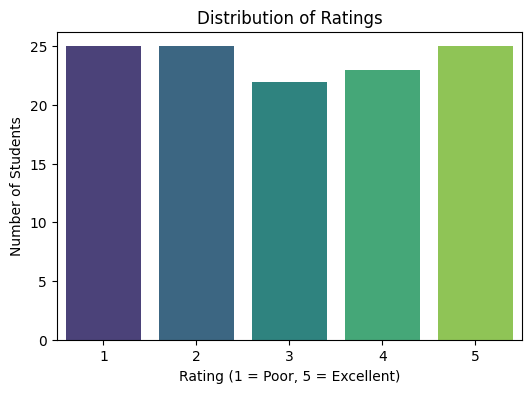

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Rating", data=df, palette="viridis")
plt.title("Distribution of Ratings")
plt.xlabel("Rating (1 = Poor, 5 = Excellent)")
plt.ylabel("Number of Students")
plt.show()


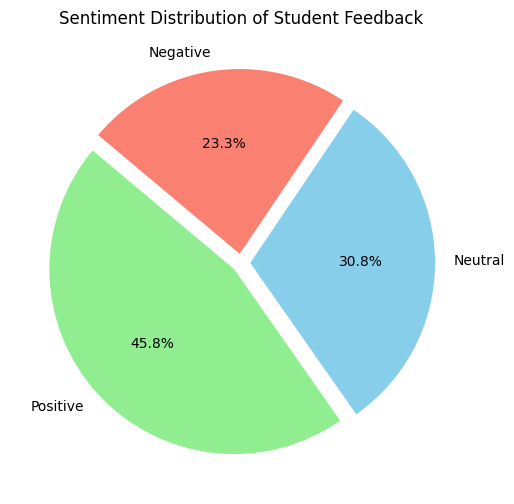

In [ ]:
# Pie Chart for Sentiment Distribution
sentiment_counts = df["Sentiment"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        colors=["lightgreen", "skyblue", "salmon"],
        startangle=140,
        explode=(0.05, 0.05, 0.05))

plt.title("Sentiment Distribution of Student Feedback")
plt.show()



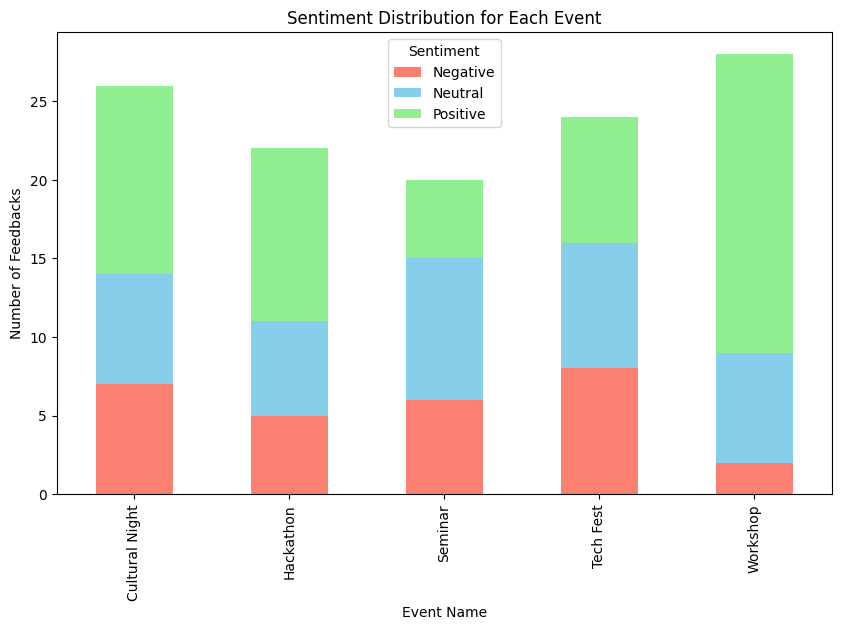

In [ ]:
# Create a crosstab of Event vs Sentiment
sentiment_event = pd.crosstab(df["Event Name"], df["Sentiment"])

# Plot stacked bar chart
sentiment_event.plot(kind="bar", stacked=True, figsize=(10,6),
                     color=["salmon", "skyblue", "lightgreen"])
plt.title("Sentiment Distribution for Each Event")
plt.xlabel("Event Name")
plt.ylabel("Number of Feedbacks")
plt.legend(title="Sentiment")
plt.show()


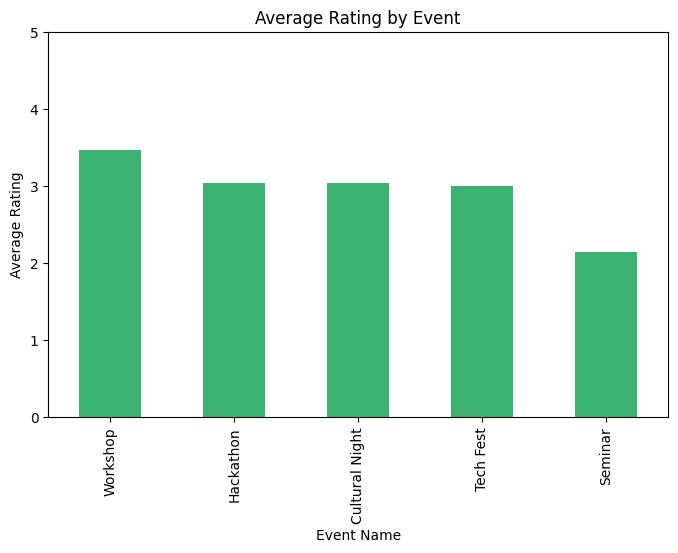

In [ ]:
# Calculate average rating for each event
avg_rating_event = df.groupby("Event Name")["Rating"].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,5))
avg_rating_event.plot(kind="bar", color="mediumseagreen")
plt.title("Average Rating by Event")
plt.xlabel("Event Name")
plt.ylabel("Average Rating")
plt.ylim(0,5)
plt.show()


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud


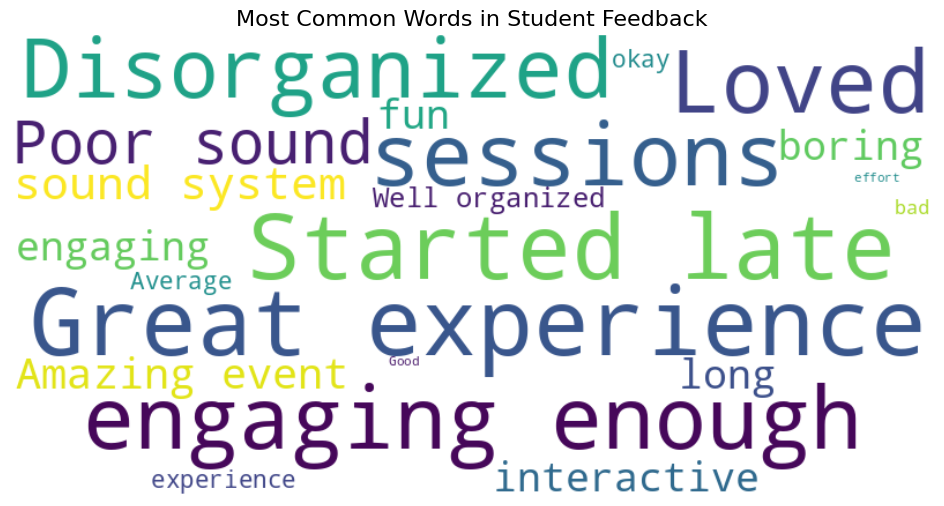

In [ ]:
# Combine all feedback comments into one string
all_feedback = " ".join(str(comment) for comment in df["Feedback Comment"])

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white",
                      colormap="viridis").generate(all_feedback)

# Plot the WordCloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Student Feedback", fontsize=16)
plt.show()


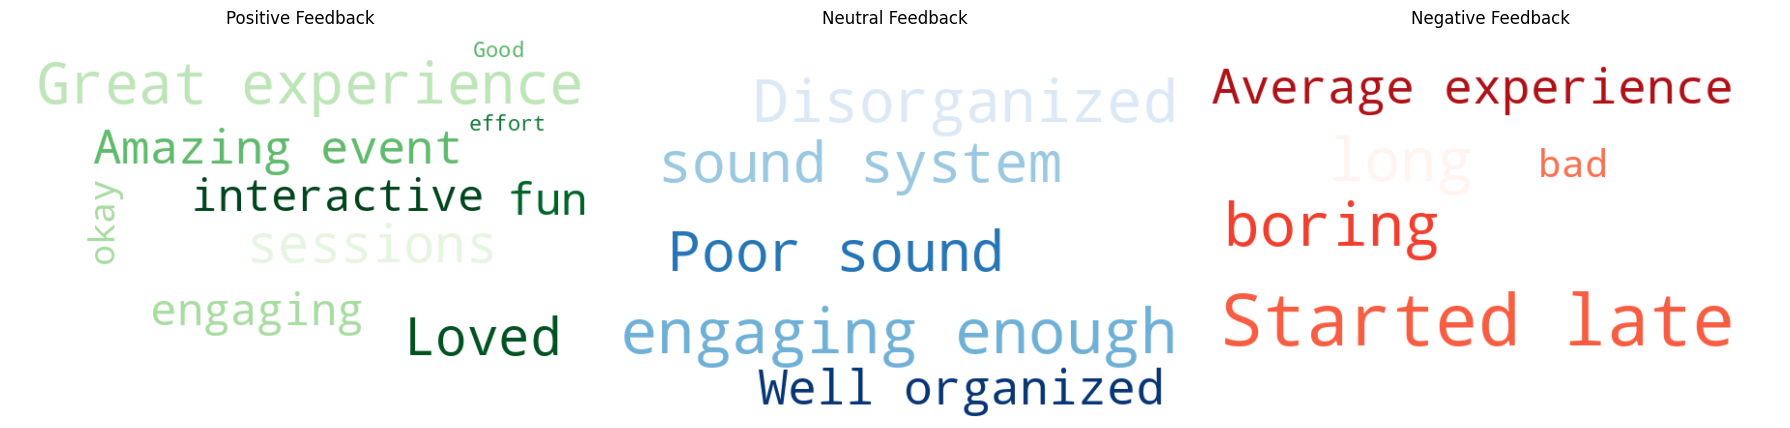

In [ ]:
# Separate feedback by sentiment
positive_feedback = " ".join(df[df["Sentiment"]=="Positive"]["Feedback Comment"].astype(str))
neutral_feedback  = " ".join(df[df["Sentiment"]=="Neutral"]["Feedback Comment"].astype(str))
negative_feedback = " ".join(df[df["Sentiment"]=="Negative"]["Feedback Comment"].astype(str))

# Generate Word Clouds
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# Positive
wordcloud_pos = WordCloud(width=600, height=400, background_color="white", colormap="Greens").generate(positive_feedback)
axes[0].imshow(wordcloud_pos, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Positive Feedback")

# Neutral
wordcloud_neu = WordCloud(width=600, height=400, background_color="white", colormap="Blues").generate(neutral_feedback)
axes[1].imshow(wordcloud_neu, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Neutral Feedback")

# Negative
wordcloud_neg = WordCloud(width=600, height=400, background_color="white", colormap="Reds").generate(negative_feedback)
axes[2].imshow(wordcloud_neg, interpolation="bilinear")
axes[2].axis("off")
axes[2].set_title("Negative Feedback")

plt.tight_layout()
plt.show()


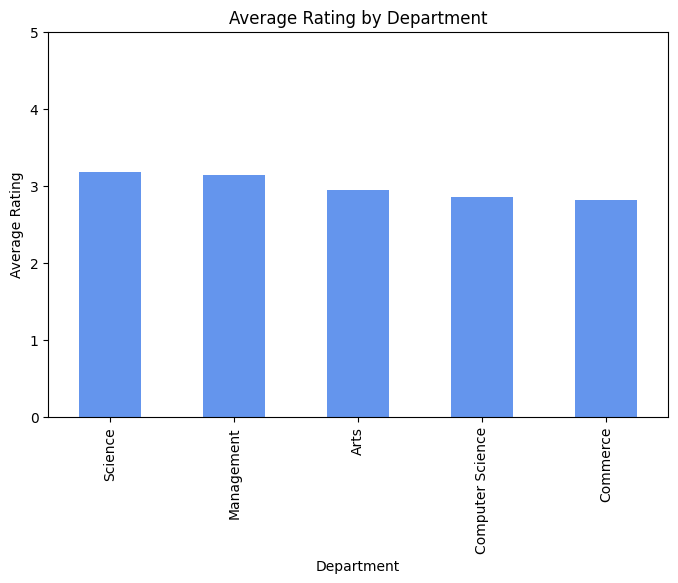

In [ ]:
# Calculate average rating for each department
avg_rating_dept = df.groupby("Department")["Rating"].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,5))
avg_rating_dept.plot(kind="bar", color="cornflowerblue")
plt.title("Average Rating by Department")
plt.xlabel("Department")
plt.ylabel("Average Rating")
plt.ylim(0,5)
plt.show()
